# TIME SERIES ANALYSIS
 Goal: Find outliers, trends and periodicity in the MTA turnstile data

### 1. Read Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as pl
import datetime as dt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [8]:
mtaRides = np.load("MTA_Fare.npy").astype(float)
mtaRides.shape

(600, 23, 194)

In [9]:
ridetype = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])

In [11]:
np.place(mtaRides, mtaRides == -1, np.nan)

In [18]:
start = dt.date(2010, 5, 21)
end = dt.date(2014, 2, 21)
dtr = pd.date_range(start, end, freq='w').tolist()

len(dtr)

196

### 2. Event Detection

In [19]:
data = np.nansum(np.nansum(mtaRides, axis = 0), axis = 0)

In [22]:
mean = np.nanmean(data)
std = np.nanstd(data)
thresholds = [mean - 3*std, mean + 3*std]
point = np.where ((data < thresholds[0]) | (data > thresholds[1]))
point[0]

dtr[point[0][0] + 1]

Timestamp('2012-10-28 00:00:00', offset='W-SUN')

The data detects a dominate event that Hurricane Sandy boarded during the week starting from 2012-10-28.

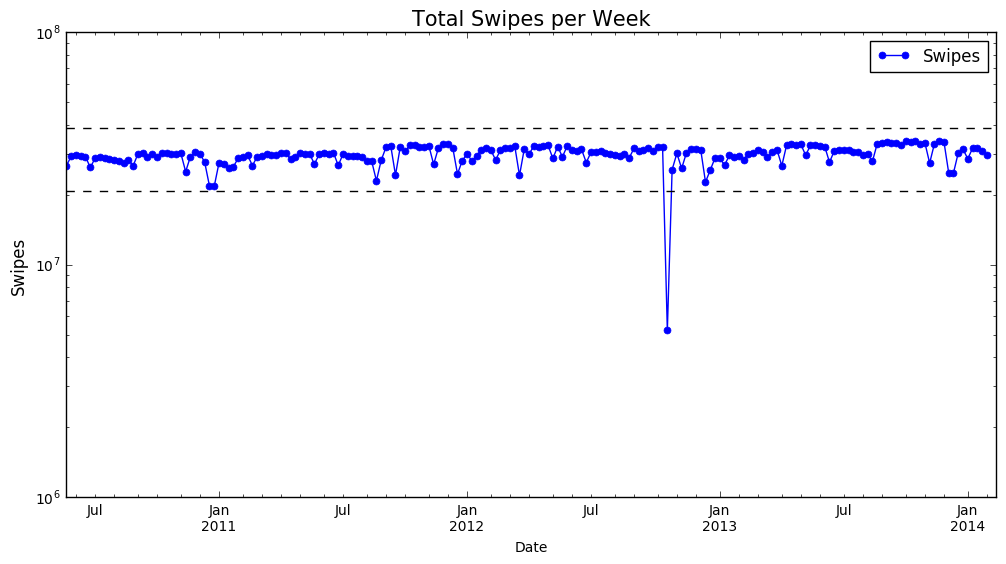

In [93]:
dp = pd.concat([pd.DataFrame(dtr), pd.DataFrame(data)], axis=1)
dp.columns = ['Date', 'Swipes']
dp.set_index(keys = ['Date'], inplace=True)
ax = dp.plot(logy=True, figsize=(12,6), style=".-", ms=10, color="Blue")
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [thresholds[0], thresholds[0]], 'k--', lw=1)
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [thresholds[1], thresholds[1]], 'k--', lw=1)
ax.set_ylabel('Swipes', fontsize= 12)
ax.set_title('Total Swipes per Week', fontsize = 15)

### 3. Trends Detection

In [83]:
data2 = pd.DataFrame(np.nansum(mtaRides, axis=0).T, columns=ridetype)
dt2_rm = data2.rolling(10).mean()

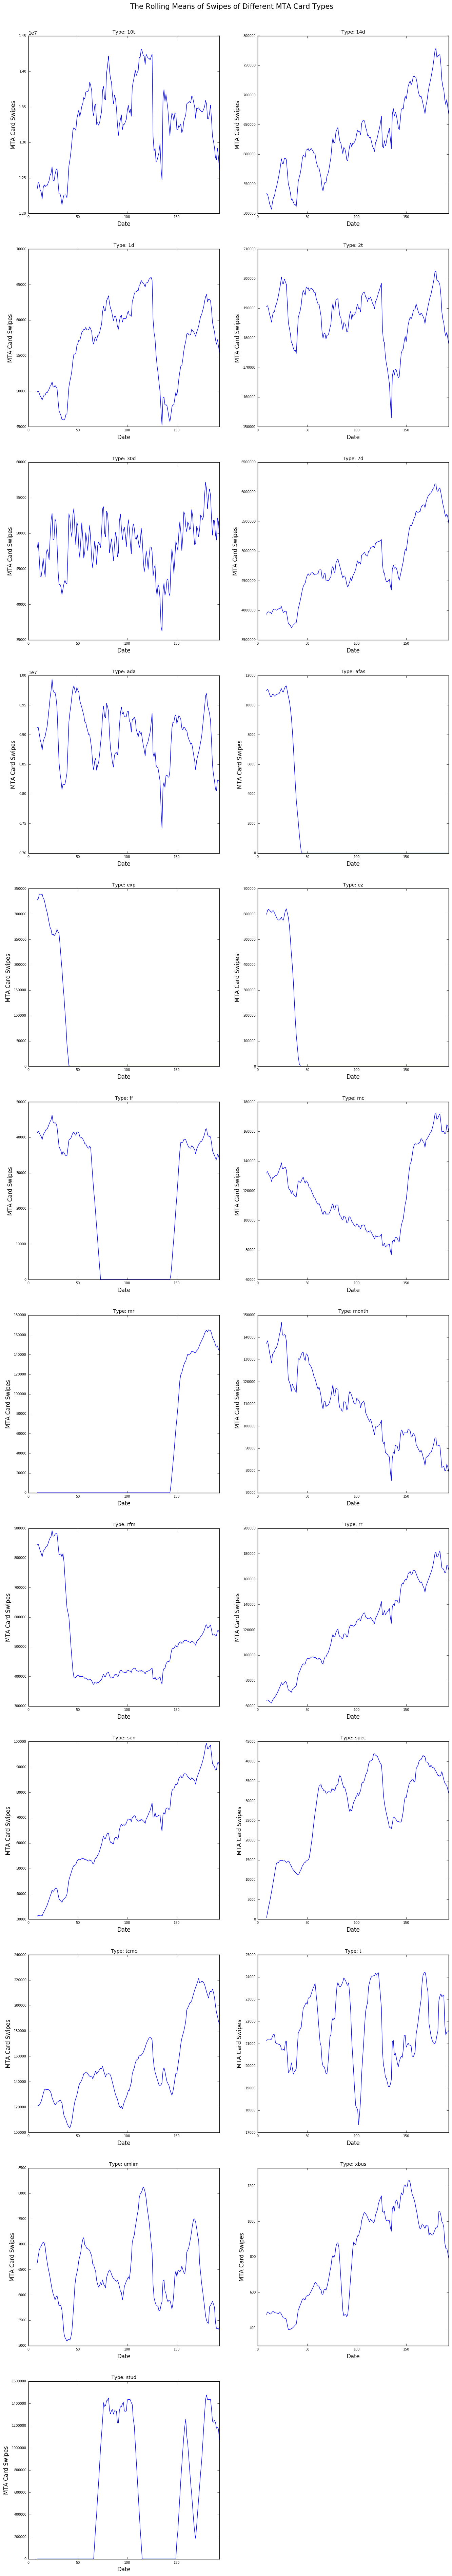

In [87]:
fig = pl.figure(figsize=(16,96))
pl.suptitle('The Rolling Means of Swipes of Different MTA Card Types', fontsize=15, y=0.91)
for i in range(23):
    ax = fig.add_subplot(12,2,i+1)
    ax = dt2_rm.iloc[:,i].plot(fontsize=7)
    ax.set_title('Type: {}'.format(ridetype[i]), fontsize=12)
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('MTA Card Swipes', fontsize=12)
pl.show()

There are seven types of MTA cards having steady trends of swipes in time series. They are 14d, 7d, month, rr, sen, tcmc, xbus and spec.

In [90]:
trend = np.array(['14d', '7d', 'month', 'rr', 'sen', 'tcmc', 'xbus', 'spec'])

In [92]:
print("The ratio of usage in the first 10 and last 10 weeks:")
for col in trend:
    ratio = np.mean(data2[col][:10]) / np.mean(data2[col][-10:])
    print("For Ride Type {}:\n  the trend ratio is {}".format(col, ratio))

The ratio of usage in the first 10 and last 10 weeks:
For Ride Type 14d:
  the trend ratio is 0.79868054602
For Ride Type 7d:
  the trend ratio is 0.719555117345
For Ride Type month:
  the trend ratio is 1.72794422105
For Ride Type rr:
  the trend ratio is 0.385659649203
For Ride Type sen:
  the trend ratio is 0.343713862169
For Ride Type tcmc:
  the trend ratio is 0.652626042706
For Ride Type xbus:
  the trend ratio is 0.601566447701
For Ride Type spec:
  the trend ratio is 0.0142485908332


### 4. Peroids Detection

In [95]:
data3 = np.nansum(mtaRides, axis = 1)

In [ ]:
pl.figure(figsize=(15,8))
